In [13]:
import mne
import pandas as pd
from pandas import DataFrame

# set false if you are not using cuda
mne.utils.set_config('MNE_USE_CUDA', 'true')


In [14]:
df: DataFrame = pd.read_csv('../datasets/csv/train-eeg-data.csv')
targets = df['Marker']
df = df.drop('Marker', axis=1)
data = df.transpose().to_numpy()


In [15]:
data

array([[-15.91,   9.04,   7.87, ...,  12.91,  19.14,  16.08],
       [ -9.86,   8.92,   9.91, ...,  16.87,  16.97,   9.83],
       [ -6.13,  -1.8 ,  -2.47, ...,  -0.98,   1.17,   1.26],
       ...,
       [  1.19,  -6.32,  -7.71, ...,   3.57,   3.5 ,   4.34],
       [ -6.15,  -6.18,  -4.17, ...,  -8.21,  -6.16,  -3.06],
       [ -0.29,  -0.17,   0.43, ...,  -0.65,   0.44,  -0.24]])

In [16]:
# ['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','A1','A2','F7','F8','T3','T4','T5','T6','Fz','Cz','Pz','X5']
ch_names = ['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','A1','A2','F7','F8','T3','T4','T5','T6','Fz','Cz','Pz','X5']
sfreq = 200

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=22, n_times=5254012
    Range : 0 ... 5254011 =      0.000 ... 26270.055 secs
Ready.


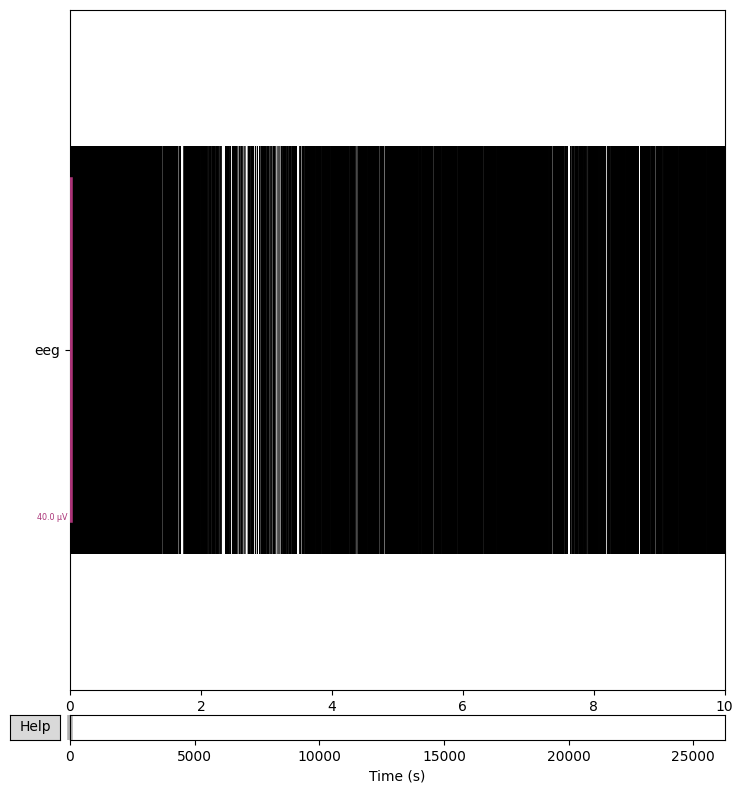

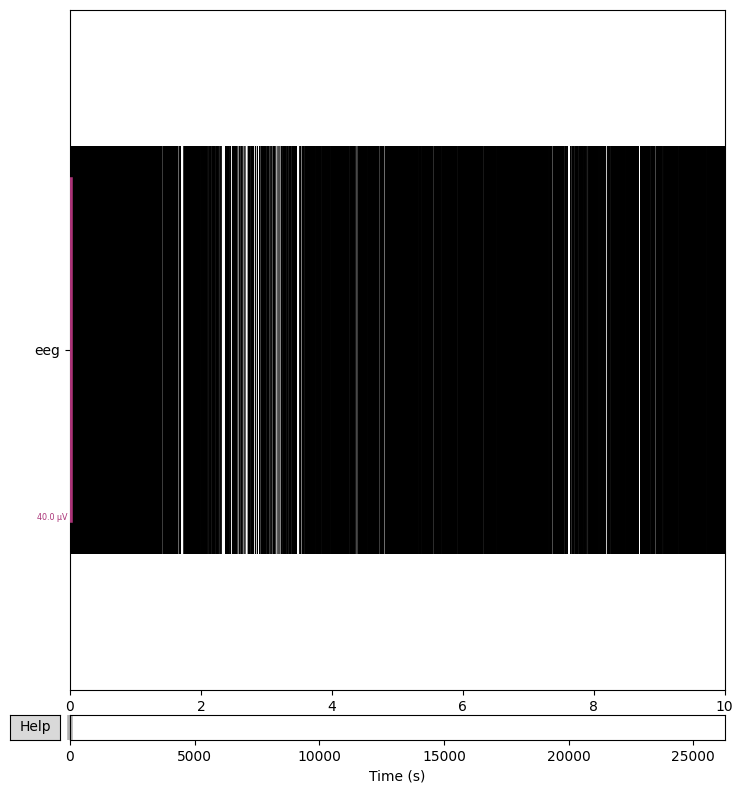

In [17]:
mne.viz.plot_raw(raw, butterfly=True)

In [18]:
low_freq, high_freq = 4.0, 40.0 # values in Hz

filtered_data = raw.filter(low_freq, high_freq, n_jobs=4)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (1.655 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done  22 out of  22 | elapsed:    3.2s finished


In [19]:
filtered_t = filtered_data.get_data().transpose()
filtered_t.shape
["Fp1","Fp2","F3","F4","C3","C4","P3","P4","O1","O2","A1","A2","F7","F8","T3","T4","T5","T6","Fz","Cz","Pz","X5"]

(5254012, 22)

In [20]:
filtered_df: DataFrame = pd.DataFrame(filtered_t, columns=ch_names)
filtered_df['Marker'] = targets

filtered_df.to_csv('../datasets/csv/filtered-train-eeg-data.csv', float_format='%.2f')
filtered_df.head()

,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,F8,T3,T4,T5,T6,Fz,Cz,Pz,X5,Marker
0,-1.199041e-14,5.773160e-15,-1.776357e-15,-1.554312e-15,-1.554312e-15,2.220446e-16,4.440892e-16,2.220446e-15,4.329870e-15,3.330669e-15,...,-5.107026e-15,8.881784e-16,1.776357e-15,-3.552714e-15,4.884981e-15,-2.220446e-16,8.881784e-16,4.662937e-15,-8.881784e-16,0
1,1.691249e+01,1.310838e+01,2.066834e+00,7.621548e+00,-7.764880e-01,9.045336e-01,4.948426e+00,-3.807855e-01,5.305529e+00,4.266583e+00,...,2.395553e+01,1.362847e+01,7.887514e+00,1.265717e+01,1.097886e+00,-2.660571e-01,-7.972990e+00,-7.466266e-01,2.014997e-01,0
2,2.233254e+01,1.670444e+01,4.986897e+00,6.476241e+00,-3.953096e-01,4.653167e-01,6.270015e+00,-5.965214e-01,4.764451e+00,3.573819e+00,...,2.389439e+01,1.682827e+01,3.168136e+00,1.323800e+01,-1.960577e+00,6.186908e-01,-7.756430e+00,-3.614422e-01,6.292038e-02,0
3,1.367184e+01,8.346069e+00,6.825228e+00,-2.900077e+00,1.136821e+00,-1.357316e+00,5.502034e+00,8.789805e-01,5.411107e-01,4.335363e-01,...,-9.920537e-03,1.011940e+01,-1.198429e+01,4.279757e+00,-8.039243e+00,1.095341e+00,-3.495043e-01,2.978152e+00,-4.313964e-01,0
4,-1.539211e+00,-6.243365e+00,5.556225e+00,-1.181596e+01,2.904192e+00,-3.487750e+00,7.470466e+00,5.151598e+00,-8.520777e-02,1.266786e+00,...,-2.576089e+01,3.910367e+00,-2.417653e+01,-9.808862e-01,-1.200121e+01,-7.753884e-01,5.996434e+00,9.750490e+00,-9.487913e-01,0


In [21]:
df_valid: DataFrame = pd.read_csv('../datasets/csv/validation-eeg-data.csv')
targets = df_valid['Marker']
df_valid = df_valid.drop('Marker', axis=1)
data = df_valid.transpose().to_numpy()
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')
raw = mne.io.RawArray(data, info)

filtered_data = raw.filter(low_freq, high_freq, n_jobs=4)

filtered_t = filtered_data.get_data().transpose()
filtered_df: DataFrame = pd.DataFrame(filtered_t, columns=ch_names)

filtered_df['Marker'] = targets

filtered_df.to_csv('../datasets/csv/filtered-validation-eeg-data.csv', float_format='%.2f')
filtered_df.head()

Creating RawArray with float64 data, n_channels=22, n_times=1502715
    Range : 0 ... 1502714 =      0.000 ...  7513.570 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (1.655 s)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  19 out of  22 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  22 out of  22 | elapsed:    0.7s finished


,Fp1,Fp2,F3,F4,C3,C4,P3,P4,O1,O2,...,F8,T3,T4,T5,T6,Fz,Cz,Pz,X5,Marker
0,-1.776357e-15,1.998401e-15,1.998401e-15,-1.221245e-15,3.330669e-16,-4.440892e-16,4.440892e-16,2.220446e-16,4.440892e-16,9.992007e-16,...,4.440892e-16,4.440892e-16,0.000000,6.661338e-16,1.776357e-15,-1.110223e-16,-3.330669e-16,-1.942890e-16,-3.108624e-15,0
1,3.566554e+00,4.149765e+00,1.968972e+00,2.420955e+00,-1.642207e+00,2.618891e+00,-4.167865e+00,2.043761e+00,-4.343844e+00,-8.368780e-01,...,3.413867e+00,1.180260e+00,2.413051,-4.712078e+00,3.759317e-01,2.506961e+00,9.008354e-01,1.213296e+00,4.307345e-01,0
2,4.450872e+00,5.687511e+00,2.252660e+00,4.270010e+00,-2.526336e+00,3.460959e+00,-6.167278e+00,2.219175e+00,-7.676476e+00,-3.629472e+00,...,5.709153e+00,1.005227e-01,2.727691,-8.647146e+00,-1.524184e+00,3.206126e+00,1.226305e+00,1.430594e+00,8.304346e-01,0
3,3.189579e+00,4.983574e+00,1.459653e+00,5.225184e+00,-2.788658e+00,2.818781e+00,-6.137178e+00,1.028295e+00,-9.577913e+00,-7.343626e+00,...,6.866182e+00,-1.877111e+00,2.380486,-1.067794e+01,-3.877440e+00,2.332988e+00,5.120227e-01,2.703756e-01,1.081143e+00,0
4,2.330548e+00,4.302575e+00,1.354192e+00,5.190853e+00,-2.933747e+00,2.282221e+00,-5.550274e+00,4.455289e-01,-9.614698e+00,-8.737293e+00,...,7.586757e+00,-1.591351e+00,3.961699,-9.826703e+00,-3.196381e+00,1.408596e+00,-1.101618e+00,-1.547935e+00,1.080173e+00,0


In [22]:
filtered_df.plot()

<Axes: >

In [23]:
df_valid.plot()

<Axes: >